In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/BrunoCroso/CompeticaoDataScience/main/Fase2/police_data')

data.head()

,stop_date,stop_time,driver_gender,driver_age,driver_race,violation,search_conducted,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,20.0,White,Speeding,False,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,40.0,White,Speeding,False,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,33.0,White,Speeding,False,Citation,False,0-15 Min,False
3,2/20/2005,17:15,M,19.0,White,Other,False,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,F,21.0,White,Speeding,False,Citation,False,0-15 Min,False


# Organização dos gráficos
**ANALISES INDIVIDUAIS**
*   Gráfico  de pizza de paradas de trânsito por gêneros
*   Gráfico  de pizza de paradas de trânsito por etnias
*   Gráfico  de pizza de paradas de trânsito por tipos de violações
*   Gráfico  de pizza de paradas de trânsito por prisões
*   Histograma de paradas de trânsito por idades
*   Histograma de paradas de trânsito por horários
*   Gráfico  de linha de paradas de trânsito por ano

**ANALISES RELACIONANDO COM GÊNERO**
*   Prisões por gênero - Gráfico de barras
*   Prisões por gênero - Gráfico de pizza
*   Tempo de duração de paradas de trânsito por gêneros

**ANALISES RELACIONANDO COM ETNIA**
*   Prisões por etnia - Gráfico de barras
*   Prisões por etnia - Gráfico de pizza
*   Tempo de duração de paradas de trânsito por etnias

**ANALISES RELACIONANDO COM IDADE**
*   Tipos de violações por idades
*   Prisões por idades

**ANALISES RELACIONANDO COM PRISÃO**
*   Prisões por tipos de violação
*   Prisões por relação com drogas
*   Prisões por tempo de duração






---


# Analises individuais


---



Text(0.5, 1.0, 'Paradas de trânsito por gênero')

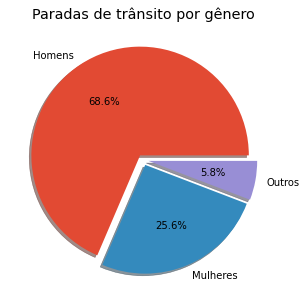

In [ ]:
plt.style.use('ggplot')
plt.figure(figsize=(5,5))

masc = 0
fem = 0
other = 0

for i in data['driver_gender']:
  if i == 'M':
    masc += 1
  elif i == 'F':
    fem += 1
  else:
    other += 1

plt.pie([masc, fem, other],labels = ['Homens', 'Mulheres', 'Outros'],explode = [0.05,0.05,0.05], autopct = '%1.1f%%',shadow = True)
plt.title('Paradas de trânsito por gênero')

[62158, 12244, 2259, 9507, 5335]


Text(0.5, 1.0, 'Paradas de trânsito por etnia')

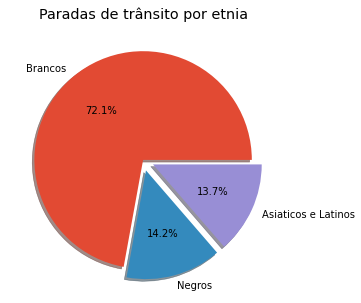

In [ ]:
plt.figure(figsize=(5,5))

brancos = 0
negros = 0
asiaticos = 0
latinos = 0

for i in data['driver_race']:
  if i == 'White':
    
    brancos += 1
  elif i == 'Black':
    negros += 1
  elif i == 'Asian':
    asiaticos += 1
  elif i == 'Hispanic':
    latinos += 1
print([brancos, negros, asiaticos, latinos, other])

plt.pie([brancos, negros, asiaticos + latinos],labels = ['Brancos', 'Negros', 'Asiaticos e Latinos'],explode = [0,0.1,0.1] ,autopct = '%1.1f%%',shadow = True)
plt.title('Paradas de trânsito por etnia')

In [ ]:
violacoes = [0,0,0,0,0] #['Excesso de velocidade', 'Problema de equipamento', 'Vioação de movimentação', 'Carteira de motorista ou placa', 'Cinto de segurança']

for i in range(len(data)):
  if data.loc[i]['violation'] == 'Speeding':
    violacoes[0] += 1
  if data.loc[i]['violation'] == 'Equipment':
    violacoes[1] += 1
  if data.loc[i]['violation'] == 'Moving violation':
    violacoes[2] += 1
  if data.loc[i]['violation'] == 'Registration/plates':
    violacoes[3] += 1
  if data.loc[i]['violation'] == 'Seat belt':
    violacoes[4] += 1

Text(0.5, 1.0, 'Paradas de trânsito por tipos de violação')

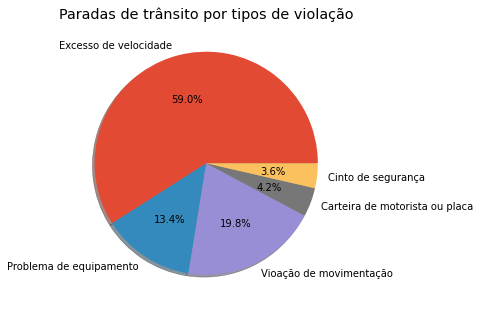

In [ ]:
plt.figure(figsize=(5,8))

plt.pie(violacoes,labels = ['Excesso de velocidade', 'Problema de equipamento', 'Vioação de movimentação', 'Carteira de motorista ou placa', 'Cinto de segurança'],autopct = '%1.1f%%',shadow = True)
plt.title('Paradas de trânsito por tipos de violação')

Text(0.5, 1.0, 'Paradas de trânsito em que houveram prisões')

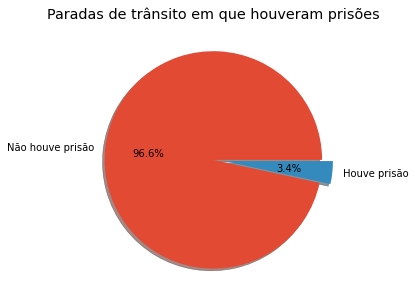

In [ ]:
plt.figure(figsize=(5,5))

prisao = [0,0] #[False, True]

for i in data['is_arrested']:
  if i == False:
    prisao[0] += 1
  elif i == True:
    prisao[1] += 1

plt.pie(prisao,labels = ['Não houve prisão', 'Houve prisão'],explode = [0,0.1] ,autopct = '%1.1f%%',shadow = True)
plt.title('Paradas de trânsito em que houveram prisões')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Paradas de trânsito')

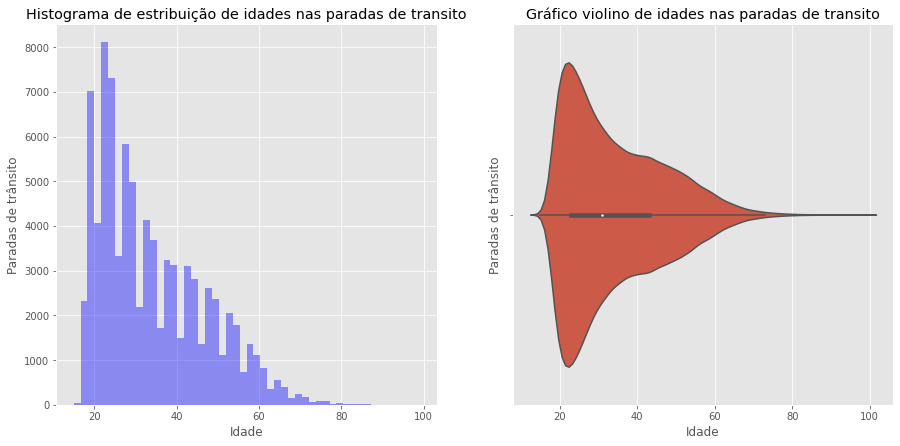

In [ ]:
plt.figure(figsize=(15,7))
plt.style.use('ggplot')

plt.subplot(1,2,1)
sns.distplot(data['driver_age'], kde = False, color='b').set_title('Histograma de estribuição de idades nas paradas de transito')
plt.xlabel('Idade')
plt.ylabel('Paradas de trânsito')

plt.subplot(1,2,2)
sns.violinplot(data['driver_age']).set_title('Gráfico violino de idades nas paradas de transito')
plt.xlabel('Idade')
plt.ylabel('Paradas de trânsito')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Paradas de trânsito')

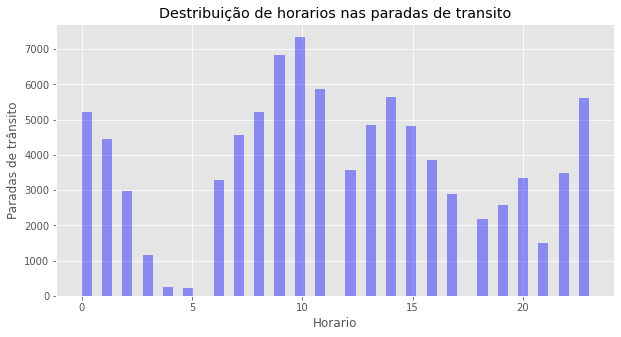

In [ ]:
plt.figure(figsize=(10,5))

hora = []
for i in data['stop_time']:
  if i[1] == ':':
    hora.append(i[0])
  else:
    hora.append(i[0:2])

sns.distplot(hora, kde = False, color='b').set_title('Destribuição de horarios nas paradas de transito')

plt.style.use('ggplot')
plt.xlabel('Horario')
plt.ylabel('Paradas de trânsito')

In [ ]:
datas = [0,0,0,0,0,0,0,0,0,0,0] #['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']

for i in range(len(data)):
  if data.loc[i]['stop_date'][-4::] == '2005':
    datas[0] += 1
  if data.loc[i]['stop_date'][-4::] == '2006':
    datas[1] += 1
  if data.loc[i]['stop_date'][-4::] == '2007':
    datas[2] += 1
  if data.loc[i]['stop_date'][-4::] == '2008':
    datas[3] += 1
  if data.loc[i]['stop_date'][-4::] == '2009':
    datas[4] += 1
  if data.loc[i]['stop_date'][-4::] == '2010':
    datas[5] += 1
  if data.loc[i]['stop_date'][-4::] == '2011':
    datas[6] += 1
  if data.loc[i]['stop_date'][-4::] == '2012':
    datas[7] += 1
  if data.loc[i]['stop_date'][-4::] == '2013':
    datas[8] += 1
  if data.loc[i]['stop_date'][-4::] == '2014':
    datas[9] += 1
  if data.loc[i]['stop_date'][-4::] == '2015':
    datas[10] += 1

print(datas)

[2558, 10639, 9476, 8752, 7908, 7561, 8126, 10970, 7924, 9228, 8599]


Text(0.5, 1.0, 'Paradas de transito ao longo dos anos')

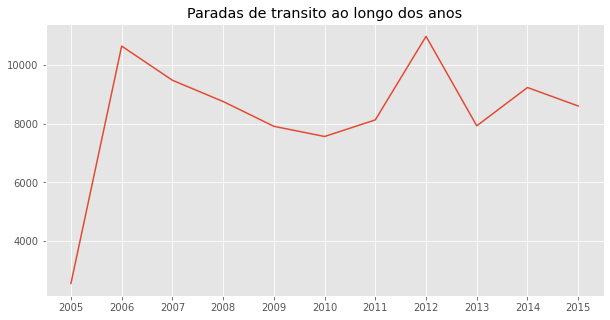

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x = ['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'], y = datas)
plt.title('Paradas de transito ao longo dos anos')



---

# Análises relacionadas ao gênero

---



In [ ]:
# Filtragem dos dados relacionados ao gênero

prisao_m = [0,0] # Homens presos, homens não presos
prisao_f = [0,0] # Mulheres presas, Mulheres não presas

duracao_m = [0,0,0] # Tempo de duração das paradas com homens na ordem '0-15 Min', '16-30 Min', '30+ Min'
duracao_f = [0,0,0]  # Tempo de duração das paradas com mulheres na ordem '0-15 Min', '16-30 Min', '30+ Min'

for i in range(len(data)):
  if data.loc[i]['driver_gender'] == 'M':
    if data.loc[i]['is_arrested'] == False:
      prisao_m[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisao_m[1] += 1

    if data.loc[i]['stop_duration'] == '0-15 Min':
      duracao_m[0] += 1
    if data.loc[i]['stop_duration'] == '16-30 Min':
      duracao_m[1] += 1
    if data.loc[i]['stop_duration'] == '30+ Min':
      duracao_m[2] += 1

  elif data.loc[i]['driver_gender'] == 'F':
    if data.loc[i]['is_arrested'] == False:
      prisao_f[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisao_f[1] += 1 

    if data.loc[i]['stop_duration'] == '0-15 Min':
      duracao_f[0] += 1
    if data.loc[i]['stop_duration'] == '16-30 Min':
      duracao_f[1] += 1
    if data.loc[i]['stop_duration'] == '30+ Min':
      duracao_f[2] += 1

Text(0.5, 1.0, 'Comparação entre ocorrência de prisões para cada gênero')

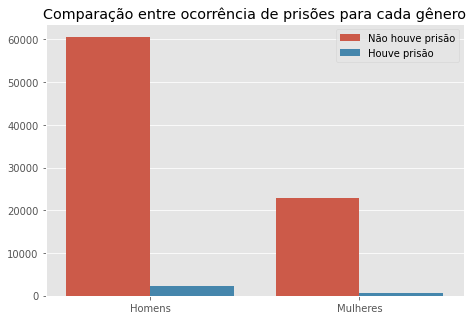

In [ ]:
plt.figure(figsize=(7.5,5))

sns.barplot(x = ['Homens', 'Homens', 'Mulheres', 'Mulheres'],
            y = prisao_m + prisao_f,
            hue = ['Não houve prisão','Houve prisão','Não houve prisão','Houve prisão']).set_title('Comparação entre ocorrência de prisões para cada gênero')

Text(0.5, 1.0, 'Ocorrencia de prisão entre mulheres')

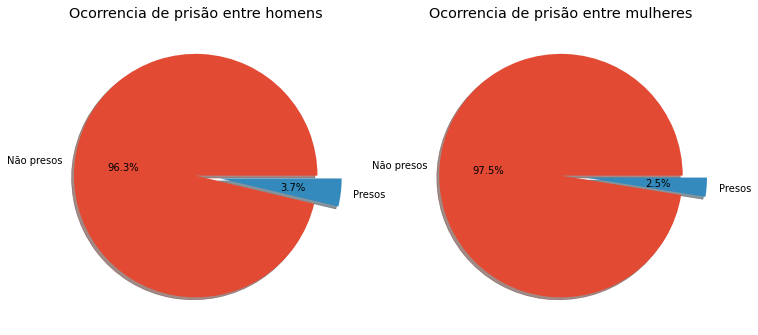

In [ ]:
plt.figure(figsize=(12,8))

plt.subplot(1,2,1)
plt.pie(prisao_m,labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão entre homens')

plt.subplot(1,2,2)
plt.pie(prisao_f,labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão entre mulheres')



Text(0.5, 1.0, 'Duração das paradas entre mulheres')

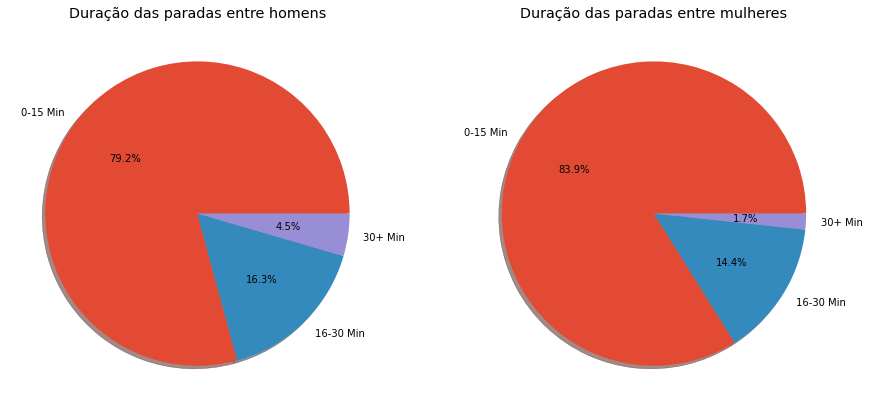

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.pie(duracao_m,labels = ['0-15 Min', '16-30 Min','30+ Min'],explode = [0,0,0], autopct = '%1.1f%%',shadow = True)
plt.title('Duração das paradas entre homens')

plt.subplot(1,2,2)
plt.pie(duracao_f,labels = ['0-15 Min', '16-30 Min','30+ Min'],explode = [0,0,0], autopct = '%1.1f%%',shadow = True)
plt.title('Duração das paradas entre mulheres')





---
# Análises relacionadas à etnia


---



In [ ]:
# Filtragem dos dados relacionados à etnia

# Valores relativos a prisão de brancos, negros e asiaticos/latinos
branco_n = 0
branco_p = 0
negro_n = 0
negro_p = 0
outro_n = 0
outro_p = 0

duracao_brancos = [0,0,0] # Tempo de duração das paradas com indivíduos brancos na ordem '0-15 Min', '16-30 Min', '30+ Min'
duracao_negros = [0,0,0]  # Tempo de duração das paradas com indivíduos negros na ordem '0-15 Min', '16-30 Min', '30+ Min'
duracao_outros = [0,0,0]  # Tempo de duração das paradas com indivíduos asiaticos/latinos na ordem '0-15 Min', '16-30 Min', '30+ Min'

for i in range(len(data)):
  if data.loc[i]['driver_race'] == 'White':
    if data.loc[i]['is_arrested'] == False:
      branco_n += 1
    if data.loc[i]['is_arrested'] == True:
      branco_p += 1

    if data.loc[i]['stop_duration'] == '0-15 Min':
      duracao_brancos[0] += 1
    if data.loc[i]['stop_duration'] == '16-30 Min':
      duracao_brancos[1] += 1
    if data.loc[i]['stop_duration'] == '30+ Min':
      duracao_brancos[2] += 1

  elif data.loc[i]['driver_race'] == 'Black':
    if data.loc[i]['is_arrested'] == False:
      negro_n += 1
    if data.loc[i]['is_arrested'] == True:
      negro_p += 1 

    if data.loc[i]['stop_duration'] == '0-15 Min':
      duracao_negros[0] += 1
    if data.loc[i]['stop_duration'] == '16-30 Min':
      duracao_negros[1] += 1
    if data.loc[i]['stop_duration'] == '30+ Min':
      duracao_negros[2] += 1

  elif data.loc[i]['driver_race'] == 'Asian' or data.loc[i]['driver_race'] == 'Hispanic':
    if data.loc[i]['is_arrested'] == False:
      outro_n += 1
    if data.loc[i]['is_arrested'] == True:
      outro_p += 1

    if data.loc[i]['stop_duration'] == '0-15 Min':
      duracao_outros[0] += 1
    if data.loc[i]['stop_duration'] == '16-30 Min':
      duracao_outros[1] += 1
    if data.loc[i]['stop_duration'] == '30+ Min':
      duracao_outros[2] += 1


Text(0.5, 1.0, 'Comparação entre ocorrência de prisões para cada etnia')

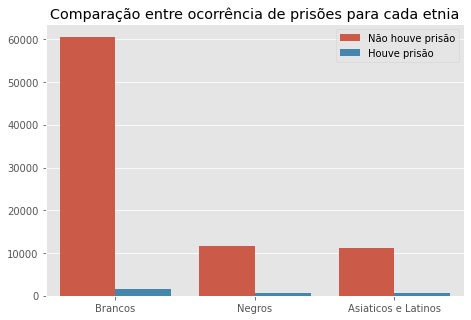

In [ ]:
plt.figure(figsize=(7.5,5))

sns.barplot(x = ['Brancos', 'Brancos', 'Negros', 'Negros','Asiaticos e Latinos','Asiaticos e Latinos'],
            y = [branco_n,branco_p,negro_n,negro_p,outro_n,outro_p],
            hue = ['Não houve prisão','Houve prisão','Não houve prisão','Houve prisão','Não houve prisão','Houve prisão']).set_title('Comparação entre ocorrência de prisões para cada etnia')

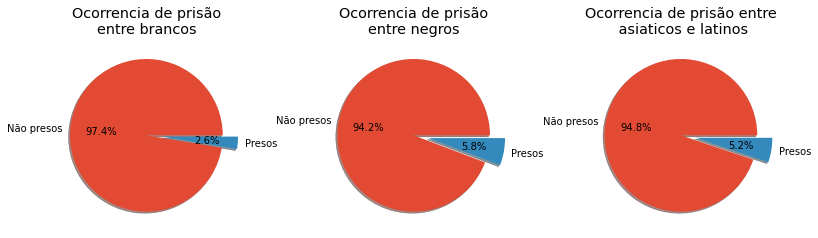

In [ ]:
plt.figure(figsize=(13,10))

plt.subplot(1,3,1)
plt.pie([branco_n,branco_p],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão\nentre brancos')

plt.subplot(1,3,2)
plt.pie([negro_n,negro_p],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão\nentre negros')

plt.subplot(1,3,3)
plt.pie([outro_n,outro_p],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão entre\n asiaticos e latinos')


plt.subplots_adjust(wspace=0.4)

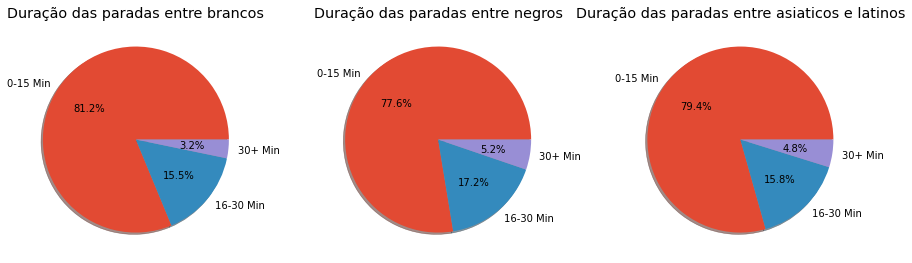

In [ ]:
plt.figure(figsize=(15,10))

plt.subplot(1,3,1)
plt.pie(duracao_brancos,labels = ['0-15 Min', '16-30 Min','30+ Min'],explode = [0,0,0], autopct = '%1.1f%%',shadow = True)
plt.title('Duração das paradas entre brancos')

plt.subplot(1,3,2)
plt.pie(duracao_negros,labels = ['0-15 Min', '16-30 Min','30+ Min'],explode = [0,0,0], autopct = '%1.1f%%',shadow = True)
plt.title('Duração das paradas entre negros')

plt.subplot(1,3,3)
plt.pie(duracao_outros,labels = ['0-15 Min', '16-30 Min','30+ Min'],explode = [0,0,0], autopct = '%1.1f%%',shadow = True)
plt.title('Duração das paradas entre asiaticos e latinos')


plt.subplots_adjust(wspace=0.3)



---

# Análises relacionadas à idade

---



In [ ]:
menos_30 = 0
de30_40 = 0
de40_50 = 0
mais_50 = 0

violacoes = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] # Cada valor do hue para cada categoria de idade
prisoes = [0,0,0,0,0,0,0,0] #Prisões por faixas de idade

for i in range(len(data)):
  if data.loc[i]['driver_age'] < 30:
    if data.loc[i]['violation'] == 'Speeding':
      violacoes[0] += 1
    if data.loc[i]['violation'] == 'Equipment':
      violacoes[1] += 1
    if data.loc[i]['violation'] == 'Moving violation':
      violacoes[2] += 1
    if data.loc[i]['violation'] == 'Registration/plates':
      violacoes[3] += 1
    if data.loc[i]['violation'] == 'Seat belt':
      violacoes[4] += 1

    if data.loc[i]['is_arrested'] == False:
      prisoes[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes[1] += 1
    
    menos_30 += 1

  elif data.loc[i]['driver_age'] < 40:
    if data.loc[i]['violation'] == 'Speeding':
      violacoes[5] += 1
    if data.loc[i]['violation'] == 'Equipment':
      violacoes[6] += 1
    if data.loc[i]['violation'] == 'Moving violation':
      violacoes[7] += 1
    if data.loc[i]['violation'] == 'Registration/plates':
      violacoes[8] += 1
    if data.loc[i]['violation'] == 'Seat belt':
      violacoes[9] += 1
    
    if data.loc[i]['is_arrested'] == False:
      prisoes[2] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes[3] += 1
    
    de30_40 += 1

  elif data.loc[i]['driver_age'] < 50:
    if data.loc[i]['violation'] == 'Speeding':
      violacoes[10] += 1
    if data.loc[i]['violation'] == 'Equipment':
      violacoes[11] += 1
    if data.loc[i]['violation'] == 'Moving violation':
      violacoes[12] += 1
    if data.loc[i]['violation'] == 'Registration/plates':
      violacoes[13] += 1
    if data.loc[i]['violation'] == 'Seat belt':
      violacoes[14] += 1

    if data.loc[i]['is_arrested'] == False:
      prisoes[4] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes[5] += 1
      
    de40_50 += 1

  elif data.loc[i]['driver_age'] >= 50:
    if data.loc[i]['violation'] == 'Speeding':
      violacoes[15] += 1
    if data.loc[i]['violation'] == 'Equipment':
      violacoes[16] += 1
    if data.loc[i]['violation'] == 'Moving violation':
      violacoes[17] += 1
    if data.loc[i]['violation'] == 'Registration/plates':
      violacoes[18] += 1
    if data.loc[i]['violation'] == 'Seat belt':
      violacoes[19] += 1

    if data.loc[i]['is_arrested'] == False:
      prisoes[6] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes[7] += 1

    mais_50 += 1

print([menos_30, de30_40, de40_50, mais_50])
print(violacoes)
print(prisoes)

hue = ['Excesso de velocidade', 'Problema de equipamento', 'Vioação de movimentação', 'Carteira de motorista ou placa', 'Cinto de segurança']
# ['Speeding', 'Other', 'Equipment', 'Moving violation', nan, 'Registration/plates', 'Seat belt']


[40589, 18972, 14122, 12437]
[23781, 5947, 6450, 1675, 1560, 10319, 2487, 3660, 852, 710, 7485, 1511, 3119, 555, 387, 6776, 1062, 2935, 345, 295]
[39078, 1508, 18204, 766, 13683, 439, 12225, 212]


Text(0, 0.5, 'Paradas de trânsito')

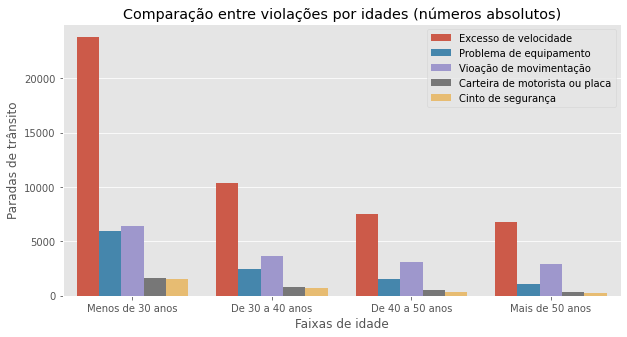

In [ ]:
plt.figure(figsize=(10,5))

sns.barplot(x = ['Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos',
                 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 
                 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 
                 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos'],
            y = violacoes, hue = 4*hue).set_title('Comparação entre violações por idades (números absolutos)')

plt.style.use('ggplot')
plt.xlabel('Faixas de idade')
plt.ylabel('Paradas de trânsito')



Text(0, 0.5, 'Frequência relativa de cada violação')

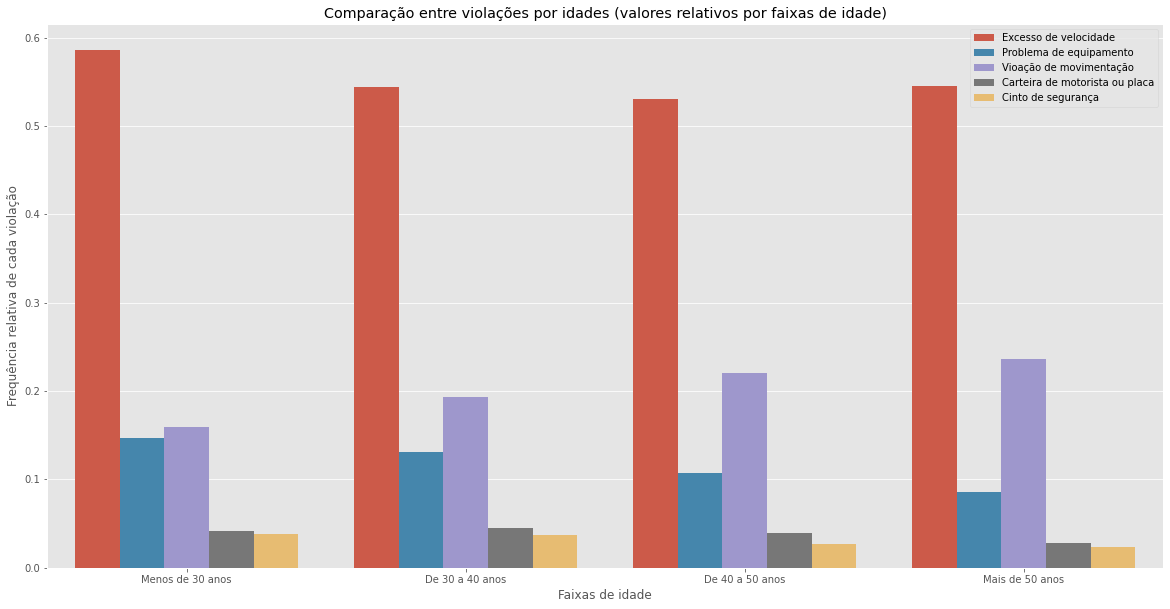

In [ ]:
violacoes_relativas = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

for i in range(len(violacoes_relativas)):
  if i in [0,1,2,3,4]:
    violacoes_relativas[i] = violacoes[i]/menos_30
  if i in [5,6,7,8,9]:
    violacoes_relativas[i] = violacoes[i]/de30_40
  if i in [10,11,12,13,14]:
    violacoes_relativas[i] = violacoes[i]/de40_50
  if i in [15,16,17,18,19]:
    violacoes_relativas[i] = violacoes[i]/mais_50


plt.figure(figsize=(20,10))

sns.barplot(x = ['Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos', 'Menos de 30 anos',
                 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 'De 30 a 40 anos', 
                 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 'De 40 a 50 anos', 
                 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos', 'Mais de 50 anos'],
            y = violacoes_relativas, hue = 4*hue).set_title('Comparação entre violações por idades (valores relativos por faixas de idade)')

plt.style.use('ggplot')
plt.xlabel('Faixas de idade')
plt.ylabel('Frequência relativa de cada violação')


Text(0, 0.5, 'Paradas de trânsito')

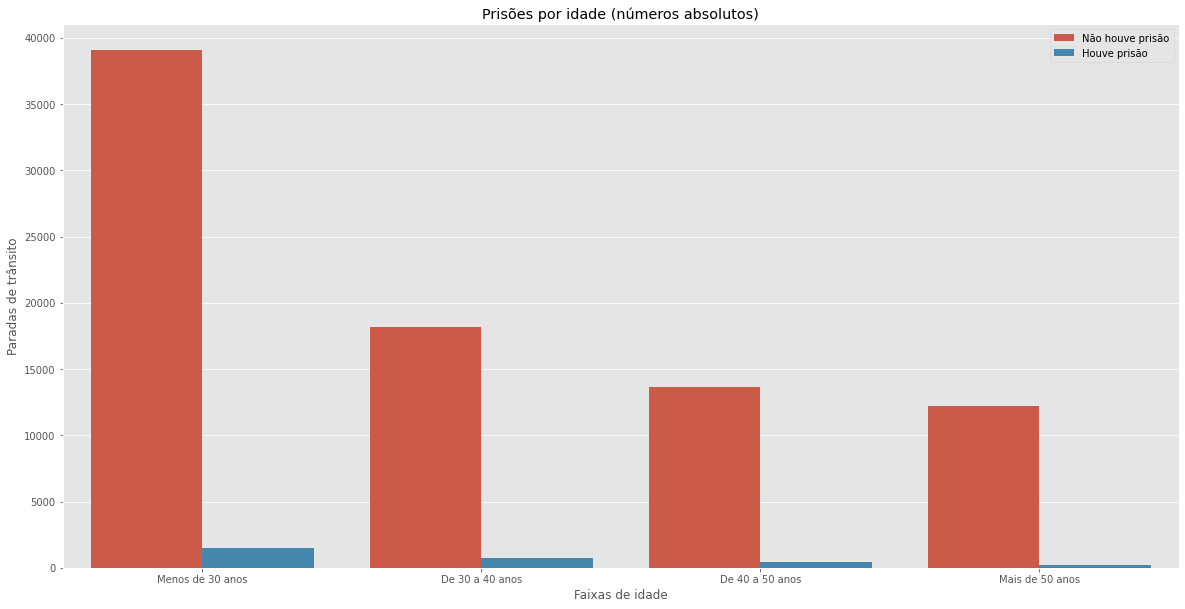

In [ ]:
plt.figure(figsize=(20,10))

sns.barplot(x = ['Menos de 30 anos', 'Menos de 30 anos',
                 'De 30 a 40 anos', 'De 30 a 40 anos',
                 'De 40 a 50 anos', 'De 40 a 50 anos',
                 'Mais de 50 anos', 'Mais de 50 anos'],
            y = prisoes, hue = ['Não houve prisão','Houve prisão','Não houve prisão','Houve prisão','Não houve prisão','Houve prisão','Não houve prisão','Houve prisão']).set_title('Prisões por idade (números absolutos)')

plt.style.use('ggplot')
plt.xlabel('Faixas de idade')
plt.ylabel('Paradas de trânsito')

Text(0, 0.5, 'Frequencia relativa para cada faixa de idade')

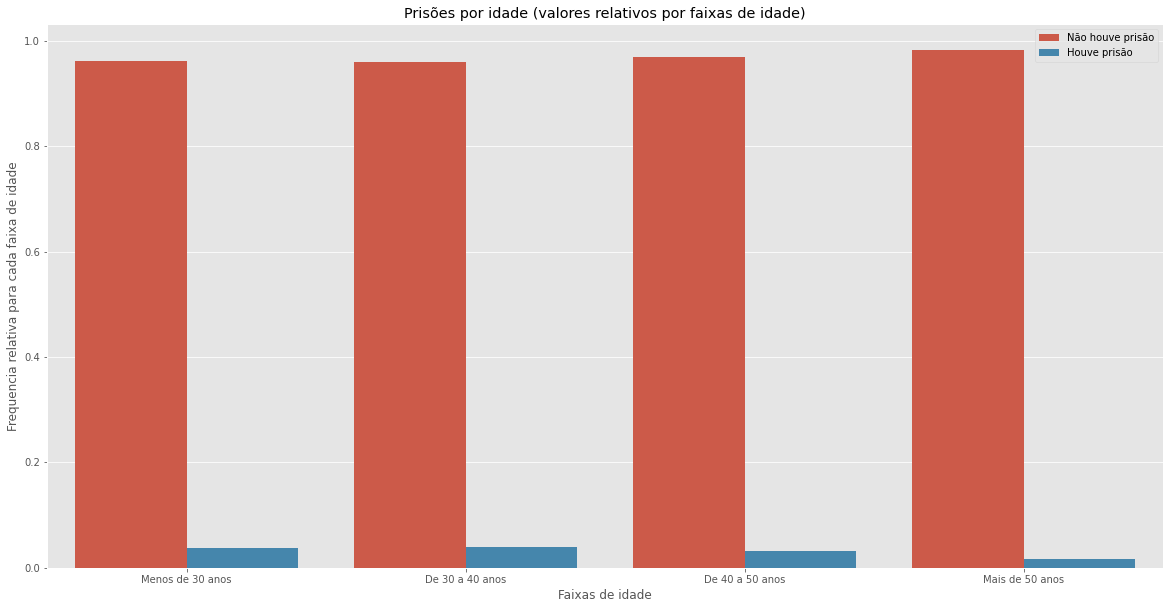

In [ ]:
plt.figure(figsize=(20,10))


prisoes_relativas = [0,0,0,0,0,0,0,0]

for i in range(len(prisoes_relativas)):
  if i in [0,1]:
    prisoes_relativas[i] = prisoes[i]/menos_30
  if i in [2,3]:
    prisoes_relativas[i] = prisoes[i]/de30_40
  if i in [4,5]:
    prisoes_relativas[i] = prisoes[i]/de40_50
  if i in [6,7]:
    prisoes_relativas[i] = prisoes[i]/mais_50

sns.barplot(x = ['Menos de 30 anos', 'Menos de 30 anos',
                 'De 30 a 40 anos', 'De 30 a 40 anos',
                 'De 40 a 50 anos', 'De 40 a 50 anos',
                 'Mais de 50 anos', 'Mais de 50 anos'],
            y = prisoes_relativas, hue = ['Não houve prisão','Houve prisão','Não houve prisão','Houve prisão','Não houve prisão','Houve prisão','Não houve prisão','Houve prisão']).set_title('Prisões por idade (valores relativos por faixas de idade)')

plt.style.use('ggplot')
plt.xlabel('Faixas de idade')
plt.ylabel('Frequencia relativa para cada faixa de idade')

Text(0.5, 1.0, 'Ocorrencia de prisão para pessoas com mais de 50 anos')

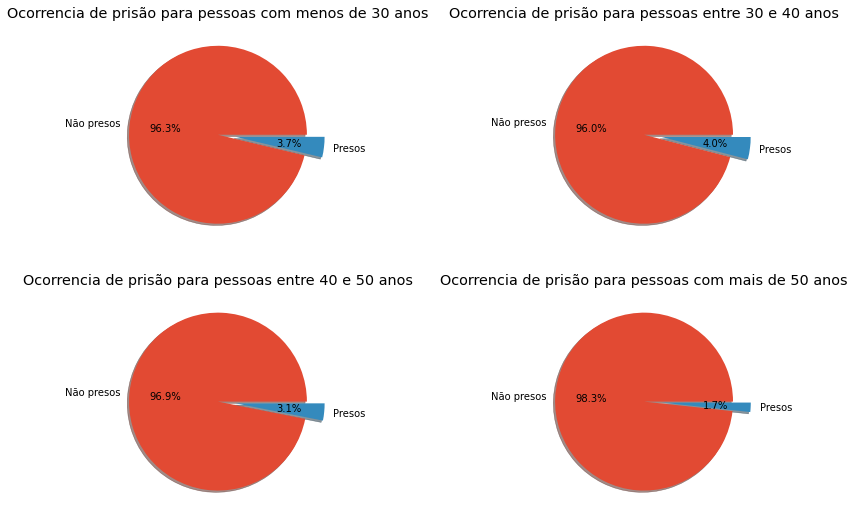

In [ ]:
plt.figure(figsize=(14,9))

plt.subplot(2,2,1)
plt.pie([prisoes[0],prisoes[1]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para pessoas com menos de 30 anos')

plt.subplot(2,2,2)
plt.pie([prisoes[2],prisoes[3]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para pessoas entre 30 e 40 anos')

plt.subplot(2,2,3)
plt.pie([prisoes[4],prisoes[5]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para pessoas entre 40 e 50 anos')


plt.subplot(2,2,4)
plt.pie([prisoes[6],prisoes[7]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para pessoas com mais de 50 anos')





---

# Análises relacionadas às prisões

---



In [ ]:
prisoes_violacoes = [0,0,0,0,0,0,0,0,0,0] #prisoes pra cada tipo de violação ('Excesso de velocidade', 'Problema de equipamento', 'Vioação de movimentação', 'Carteira de motorista ou placa', 'Cinto de segurança')

for i in range(len(data)):
  if data.loc[i]['violation'] == 'Speeding':
    if data.loc[i]['is_arrested'] == False:
      prisoes_violacoes[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_violacoes[1] += 1
    

  if data.loc[i]['violation'] == 'Equipment':
    if data.loc[i]['is_arrested'] == False:
      prisoes_violacoes[2] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_violacoes[3] += 1
    

  if data.loc[i]['violation'] == 'Moving violation':
    if data.loc[i]['is_arrested'] == False:
      prisoes_violacoes[4] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_violacoes[5] += 1
      

  if data.loc[i]['violation'] == 'Registration/plates':
    if data.loc[i]['is_arrested'] == False:
      prisoes_violacoes[6] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_violacoes[7] += 1

  if data.loc[i]['violation'] == 'Seat belt':
    if data.loc[i]['is_arrested'] == False:
      prisoes_violacoes[8] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_violacoes[9] += 1


print(prisoes_violacoes)

[47826, 637, 10385, 635, 15314, 910, 3098, 334, 2878, 74]


Text(0.5, 1.0, 'Ocorrencia de prisão para problemas de carteira ou placa')

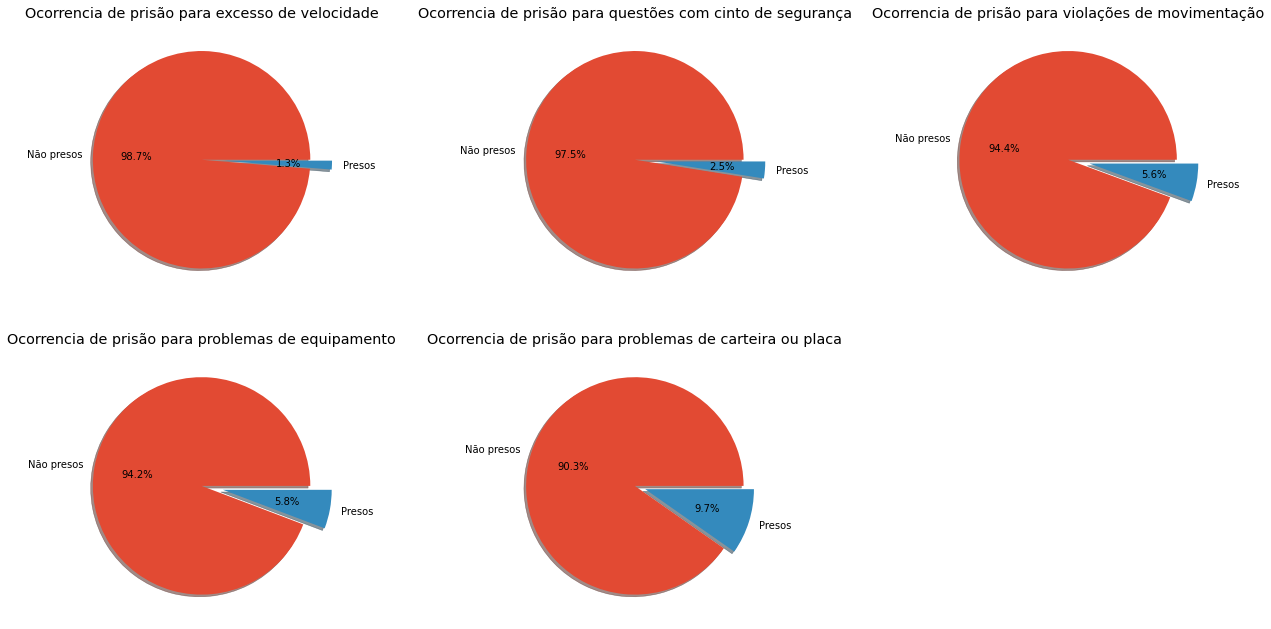

In [ ]:
plt.figure(figsize=(22,11))

plt.subplot(2,3,1)
plt.pie([prisoes_violacoes[0],prisoes_violacoes[1]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para excesso de velocidade')

plt.subplot(2,3,2)
plt.pie([prisoes_violacoes[8],prisoes_violacoes[9]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para questões com cinto de segurança')

plt.subplot(2,3,3)
plt.pie([prisoes_violacoes[4],prisoes_violacoes[5]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para violações de movimentação')

plt.subplot(2,3,4)
plt.pie([prisoes_violacoes[2],prisoes_violacoes[3]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para problemas de equipamento')

plt.subplot(2,3,5)
plt.pie([prisoes_violacoes[6],prisoes_violacoes[7]],labels = ['Não presos', 'Presos'],explode = [0,0.1], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrencia de prisão para problemas de carteira ou placa')


In [ ]:
prisoes_drogas = [0,0,0,0] #[sem prisao e sem drogas, com prisao e sem drogas, sem prisao e com drogas, com prisao e com drogas]

for i in range(len(data)):
  if data.loc[i]['drugs_related_stop'] == False:
    if data.loc[i]['is_arrested'] == False:
      prisoes_drogas[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_drogas[1] += 1
  if data.loc[i]['drugs_related_stop'] == True:
    if data.loc[i]['is_arrested'] == False:
      prisoes_drogas[2] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_drogas[3] += 1

print(prisoes_drogas)

[82875, 2718, 604, 211]


Text(0.5, 1.0, 'Ocorrência de prisões quando há\n relação com drogas na parada')

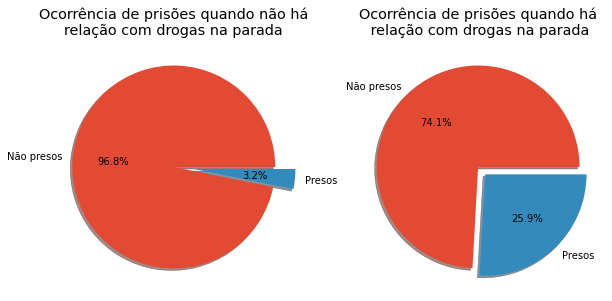

In [ ]:
plt.figure(figsize=(10,7))

plt.subplot(1,2,1)
plt.pie([prisoes_drogas[0],prisoes_drogas[1]],labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrência de prisões quando não há\nrelação com drogas na parada')

plt.subplot(1,2,2)
plt.pie([prisoes_drogas[2],prisoes_drogas[3]],labels = ['Não presos', 'Presos'],explode = [0,0.1], autopct = '%1.1f%%',shadow = True)
plt.title('Ocorrência de prisões quando há\n relação com drogas na parada')


In [ ]:
prisoes_menos15 = [0,0] # Não prisões com menos de 15 min, prisões com menos de 15 min
prisoes_16_30 = [0,0] # Não prisões de 16 a 30 min, prisões de 16 a 30 min
prisoes_mais30 = [0,0] # Não prisões com menos de 15 min, prisões com menos de 15 min

for i in range(len(data)):
  if data.loc[i]['stop_duration'] == '0-15 Min':
    if data.loc[i]['is_arrested'] == False:
      prisoes_menos15[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_menos15[1] += 1
 
  if data.loc[i]['stop_duration'] == '16-30 Min':
    if data.loc[i]['is_arrested'] == False:
      prisoes_16_30[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_16_30[1] += 1  

  if data.loc[i]['stop_duration'] == '30+ Min':
    if data.loc[i]['is_arrested'] == False:
      prisoes_mais30[0] += 1
    if data.loc[i]['is_arrested'] == True:
      prisoes_mais30[1] += 1

Text(0.5, 1.0, 'Prisões quando a duração é\nde mais de 30 minutos')

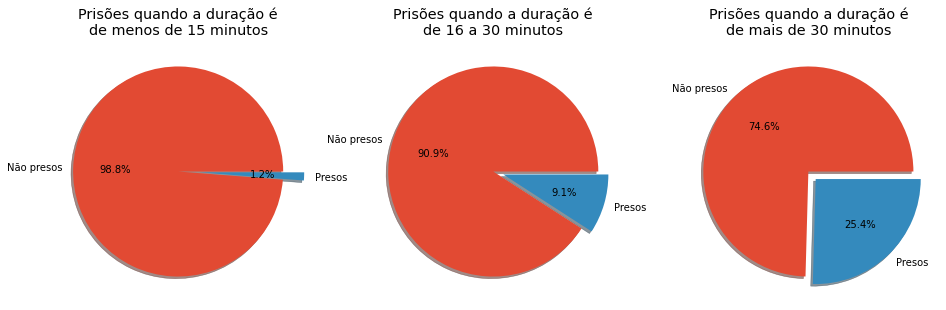

In [ ]:
plt.figure(figsize=(16,15))

plt.subplot(1,3,1)
plt.pie(prisoes_menos15,labels = ['Não presos', 'Presos'],explode = [0,0.2], autopct = '%1.1f%%',shadow = True)
plt.title('Prisões quando a duração é\nde menos de 15 minutos')

plt.subplot(1,3,2)
plt.pie(prisoes_16_30,labels = ['Não presos', 'Presos'],explode = [0,0.1], autopct = '%1.1f%%',shadow = True)
plt.title('Prisões quando a duração é\nde 16 a 30 minutos')

plt.subplot(1,3,3)
plt.pie(prisoes_mais30,labels = ['Não presos', 'Presos'],explode = [0,0.1], autopct = '%1.1f%%',shadow = True)
plt.title('Prisões quando a duração é\nde mais de 30 minutos')
